In [1]:
import wrangle as w
import pandas as pd
import explore as e
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import geopandas as gpd
from geopandas import datasets
import warnings


In [2]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Let the judgement begin
![Judge Ru presiding](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZWY0NzEwOGNhNDBlYTRhMDRmY2FiMzIyMmMzZGQ0MzEwNDQwZDBlNSZjdD1n/MbgUbPUSiuaZy/giphy.gif)

RuPaul's Drag Race is a competition reality show which began airing in 2009 on LogoTV, a small premium cable channel geared towards LGBTQ+ audiences. Since then, it has become an international phenomenon, winning multiple Emmy award and spawning multiple spinoffs and international versions. It has moved channels twice, first to VH1, and then to its current home on MTV, where it is now airing its fifteenth season. Winners of the show have toured internationally, [starred on Broadway in Drag](https://www.forbes.com/sites/jerylbrunner/2023/02/13/jinkx-monsoon-makes-a-big-splash-on-broadway-in-chicago/?sh=d9ebd493e4e2) and even gone on to host international versions of the show. The show has pretty much singlehandedly catapulted drag into the spotlight and given wider visibility to this distinctly queer artform.

In case that introduction wasn't clear, I'm a **HUGE** fan of the show. I have seen every season from 3 onward, have a frankly alarming amount of merch from my favorite queens, and have seen more of them than I can count live. I've had my own intuitive methods of attempting to divine the winning queen. However, as my crystal ball is in the shop, I'm going to try to see if I can build a predictive model to figure it out for me! 
## Will Woody be able to crack the code and predict the next winner?

![idk](https://c.tenor.com/0tntfvosClgAAAAC/alaska-rpdr.gif)

But whatever happens, it should be sickening the house down boots yas gawd mama ockurrrr

# Mini Challenge - Acquisitiion and Preparation

In [3]:
reload(w)
queens, queeneps, episodes =  w.get_show_data(repull=True)


## Acquiring the data
- Data from the original show and 7 different international spinoffs (see below for complete list) was collected from Wikipedia using Beautiful Soup.


In [4]:
reload(e)
e.series_markdown(episodes)

- Rupaul's Drag Race (seasons 1-14)

- Drag Race UK (seasons 1-4)

- Canada's Drag Race (seasons 1-3)

- Drag Race Down Under (seasons 1-2)

- Drag Race España (seasons 1-2)

- Drag Race Holland (seasons 1-2)

- Drag Race Italia (seasons 1-2)

- Drag Race France (season 1)



- Data was collected in 3 parts from 3 different tables on each season's page:
    - `queens`: data detailing the series the queen participated in, as well as name, age, hometown, and their placement in the season
    - `episodes`: data detailing the episodes, including the series, season, and episode, its air date, and, where applicable information about the mini challenge, mini challenge winner, main/maxi challenge, and runway theme
    - `queeneps`: Data detailing the performance of each queen per episode. This also includes the series, season, and episode, in addition to their placement in each episode

In [5]:
queens.head()

,queen_name,age,series,season,placement,city,region,relative_placement,winner
0,BeBe Zahara Benet,28,Rupaul's Drag Race,1,1,Minneapolis,Minnesota,1.000000,True
1,Nina Flowers,34,Rupaul's Drag Race,1,2,Denver,Colorado,0.888889,False
2,Rebecca Glasscock,26,Rupaul's Drag Race,1,3,Fort Lauderdale,Florida,0.777778,False
3,Shannel,29,Rupaul's Drag Race,1,4,Las Vegas,Nevada,0.666667,False
4,Ongina,26,Rupaul's Drag Race,1,5,Los Angeles,California,0.555556,False


Outcome Code | Meaning
---|---
SAFE | Queen was designated safe
WIN | Queen won the week's maxi-challenge
BTM | Queen lip synced for their life, but was not eliminated
ELIM | Queen was eliminated from the competition
DISQ | Queen was disqualified from further participation in the competition

The data was then split between train, validate, and test on each of the queens 

In [6]:
reload(w)

train, test = w.split_queens(queens, queeneps, episodes)


In [7]:
train.head()

,,age,series,season,placement,city,region,relative_placement,winner,episode,outcome,minichalw,episode_name,air_date,summary,mini_challenge,main_challenge,mini_challenge_winner,runway_theme
queen_name,episode_id,,,,,,,,,,,,,,,,,,
Roxxxy Andrews,51,28,Rupaul's Drag Race,5,2,Orlando,Florida,0.928571,False,1,WIN,True,"""RuPaullywood or Bust""",2013-01-28,Fourteen new queens enter the workroom. For th...,Underwater photoshoot,A custom gown by Marco Marco plus immunity fro...,Detox,None
Jade Jolie,51,25,Rupaul's Drag Race,5,8,Gainesville,Florida,0.500000,False,1,SAFE,False,"""RuPaullywood or Bust""",2013-01-28,Fourteen new queens enter the workroom. For th...,Underwater photoshoot,A custom gown by Marco Marco plus immunity fro...,Detox,None
Honey Mahogany,51,29,Rupaul's Drag Race,5,10,San Francisco,California,0.357143,False,1,SAFE,True,"""RuPaullywood or Bust""",2013-01-28,Fourteen new queens enter the workroom. For th...,Underwater photoshoot,A custom gown by Marco Marco plus immunity fro...,Detox,None
Jinkx Monsoon,51,24,Rupaul's Drag Race,5,1,Seattle,Washington,1.000000,True,1,SAFE,False,"""RuPaullywood or Bust""",2013-01-28,Fourteen new queens enter the workroom. For th...,Underwater photoshoot,A custom gown by Marco Marco plus immunity fro...,Detox,None
Lineysha Sparx,51,24,Rupaul's Drag Race,5,9,San Juan,Puerto Rico,0.428571,False,1,SAFE,False,"""RuPaullywood or Bust""",2013-01-28,Fourteen new queens enter the workroom. For th...,Underwater photoshoot,A custom gown by Marco Marco plus immunity fro...,Detox,None


In [8]:
train.index.get_level_values(1)

Int64Index([ 51,  51,  51,  51,  51,  51,  51,  51,  51,  51,
            ...
            298, 298, 142, 142, 142, 144, 144,  91,  91,  91],
           dtype='int64', name='episode_id', length=1843)

## What is the average challenge outcome of winners and non-winners?

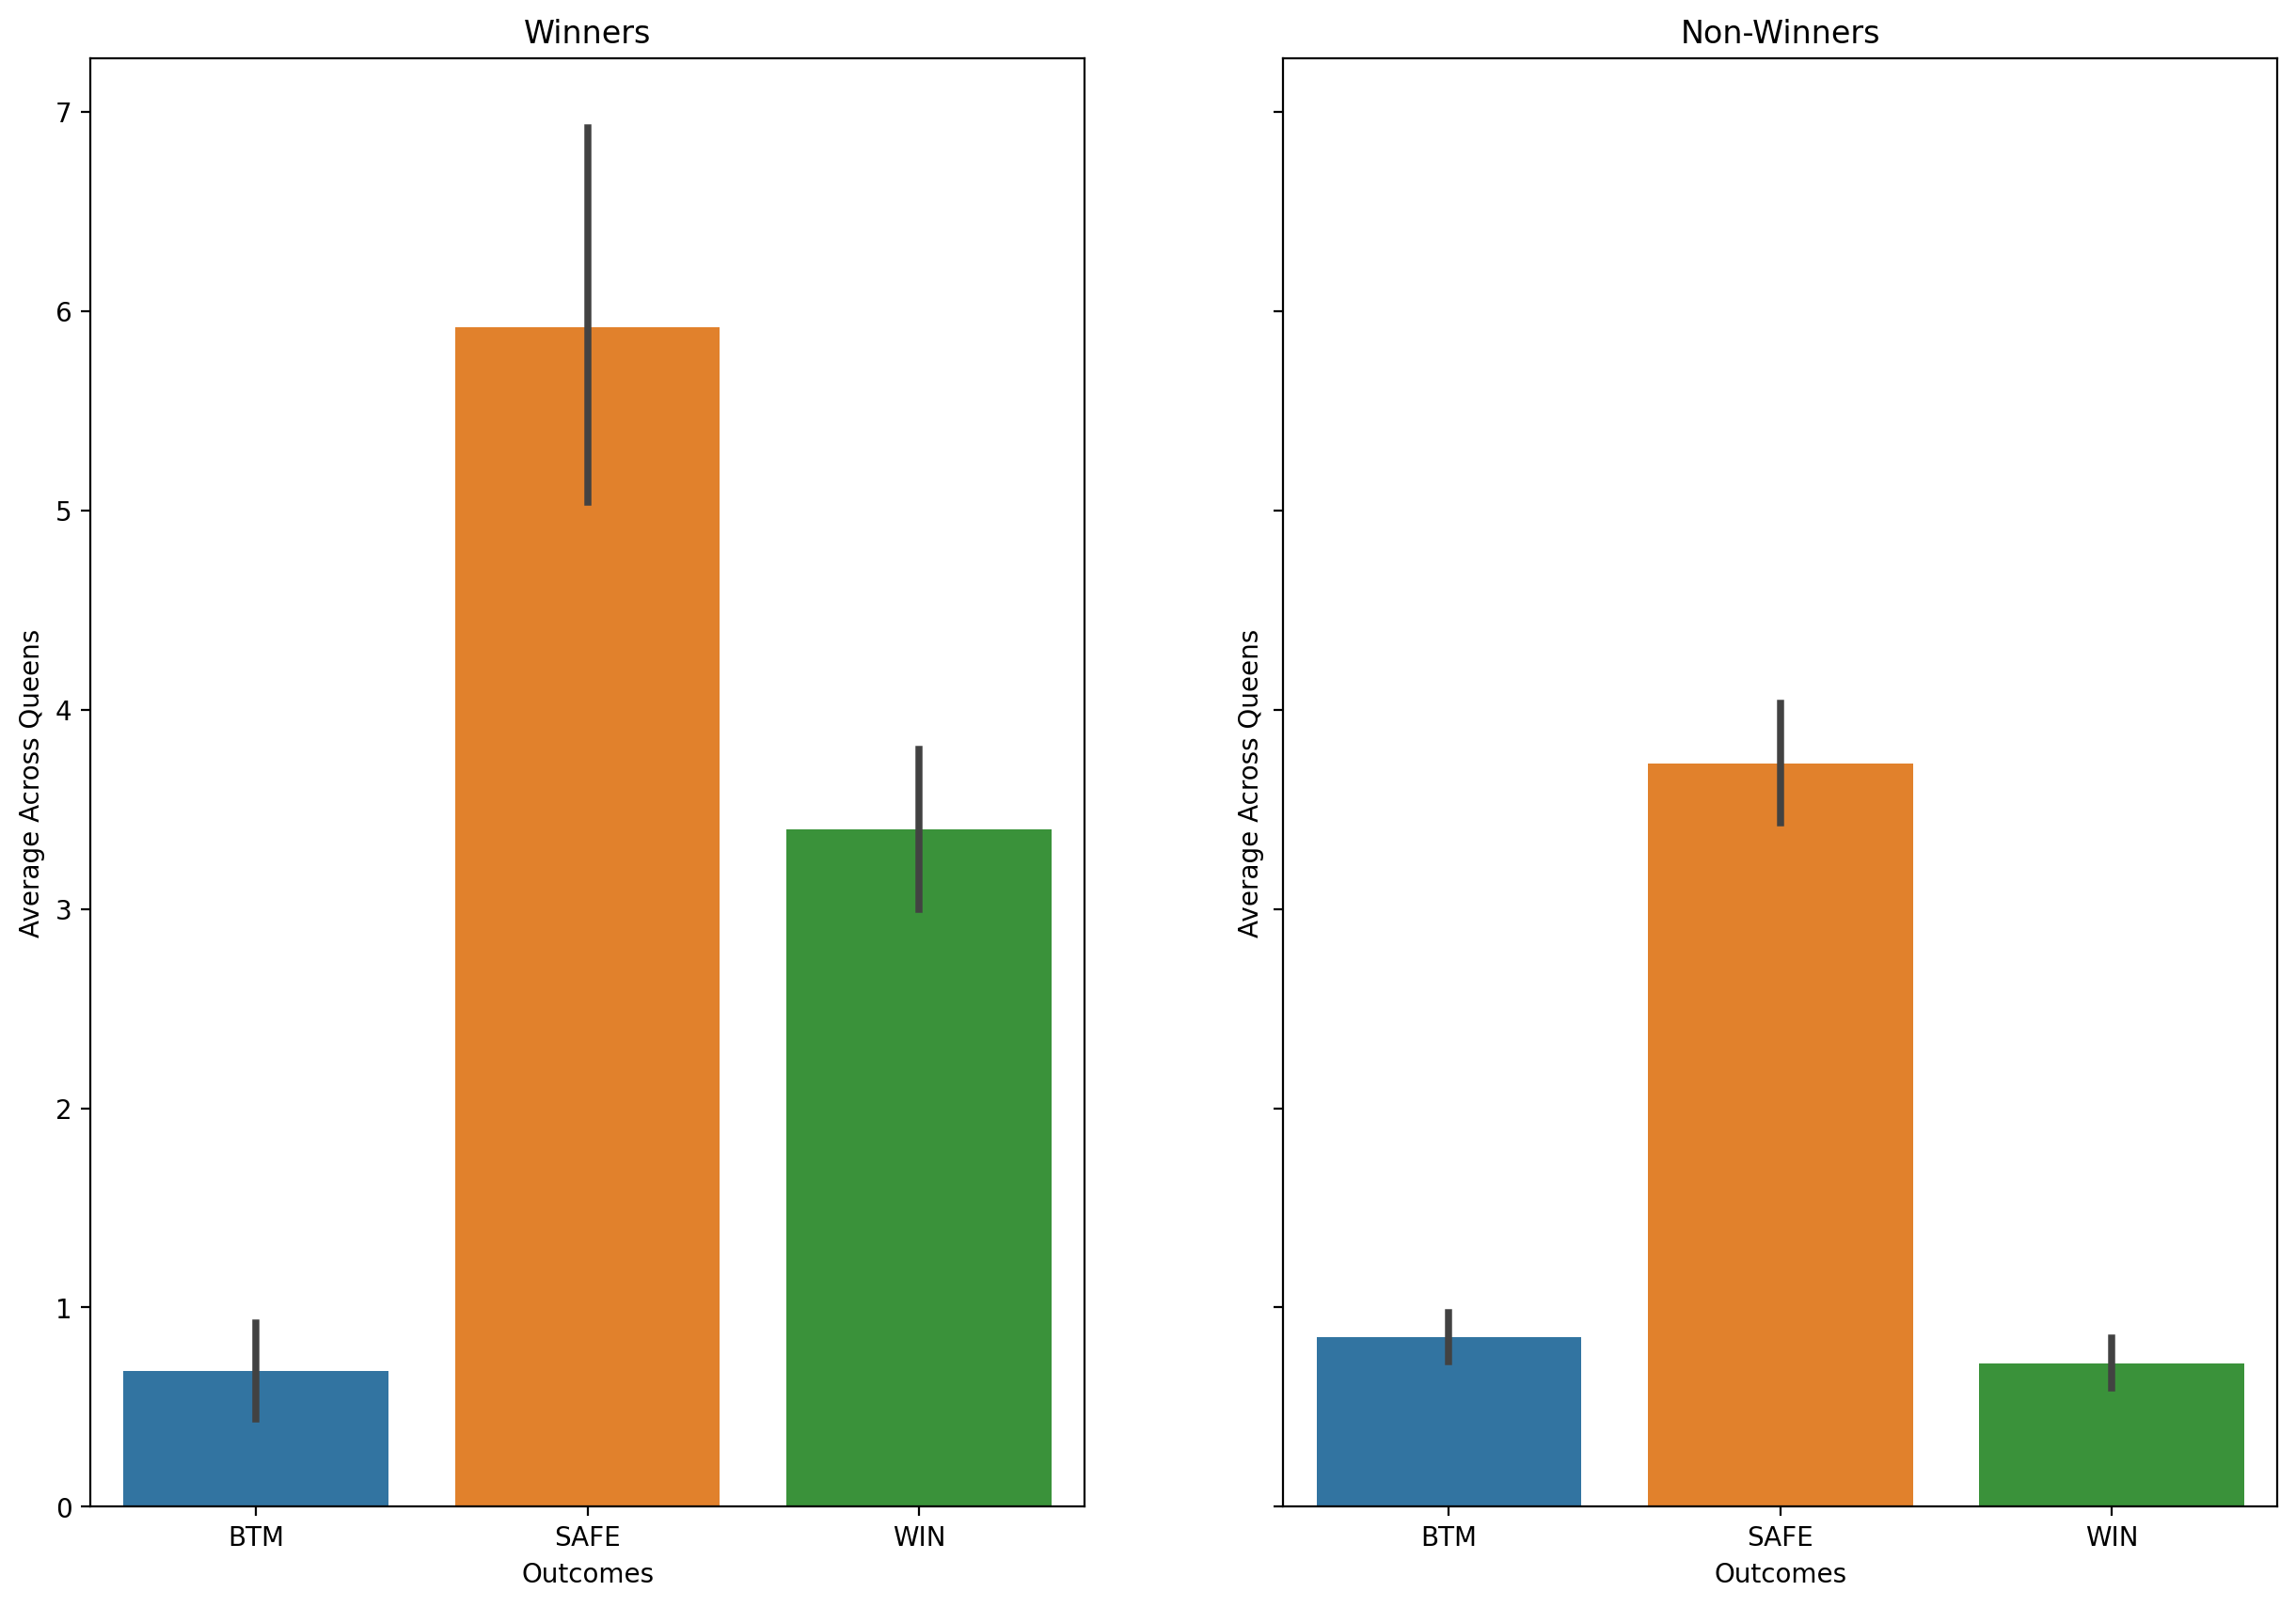

In [9]:
challenge_outcomes = pd.get_dummies(train.outcome)
challenge_outcomes['winner'] = train.winner
challenge_outcomes = challenge_outcomes.groupby(level=0).sum()
fig, axs = plt.subplots(1,2,figsize=(15,10),sharey=True)
sns.barplot(data=challenge_outcomes[challenge_outcomes.winner > 0].drop(columns=['winner','ELIM']),ax=axs[0])
sns.barplot(data=challenge_outcomes[challenge_outcomes.winner == 0].drop(columns=['winner','ELIM']),ax=axs[1])
axs[0].set_title('Winners')
axs[1].set_title('Non-Winners')
[ax.set_xlabel('Outcomes') for ax in axs]
[ax.set_ylabel('Average Across Queens') for ax in axs]
plt.show()

## How many challenges to winners win compared to non-winners?

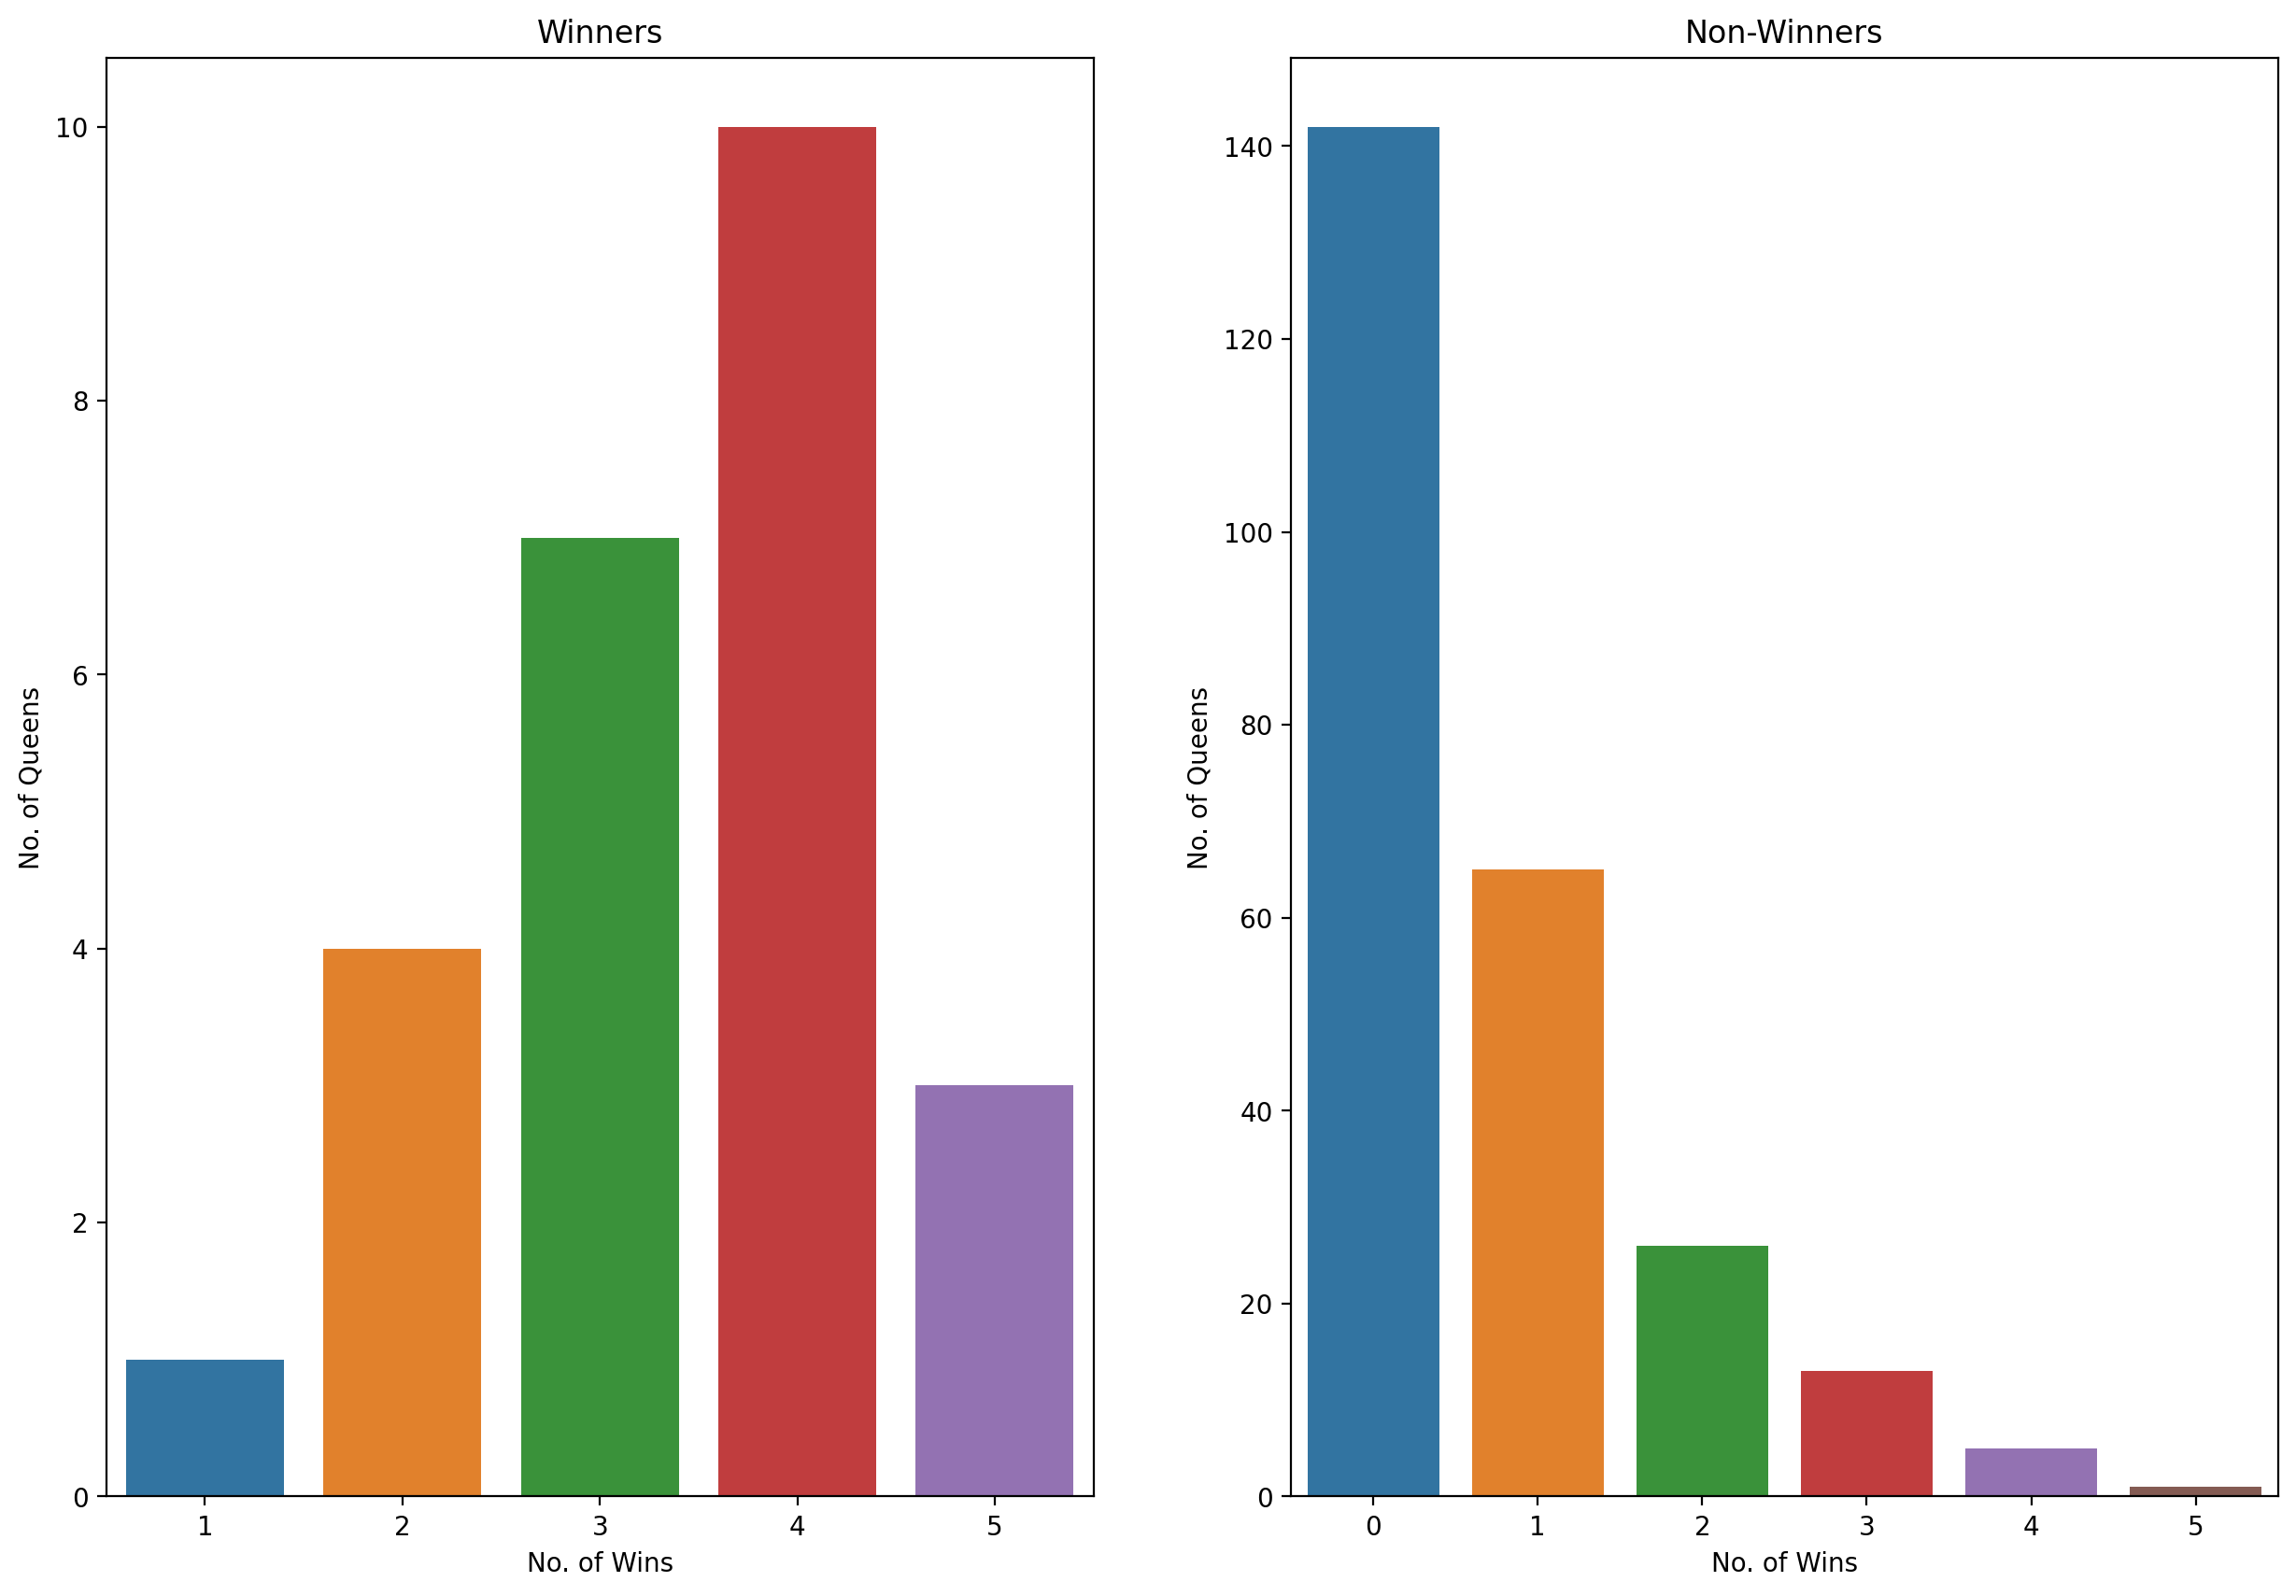

In [10]:
fig, axs = plt.subplots(1,2,figsize=(15,10))
sns.countplot(data=challenge_outcomes[challenge_outcomes.winner > 0],x='WIN',ax=axs[0])
sns.countplot(data=challenge_outcomes[challenge_outcomes.winner == 0],x='WIN',ax=axs[1])
axs[0].set_title('Winners')
axs[1].set_title('Non-Winners')
[ax.set_xlabel('No. of Wins') for ax in axs]
[ax.set_ylabel('No. of Queens') for ax in axs]
plt.show()

## Do winners tend to win more mini-challenges?

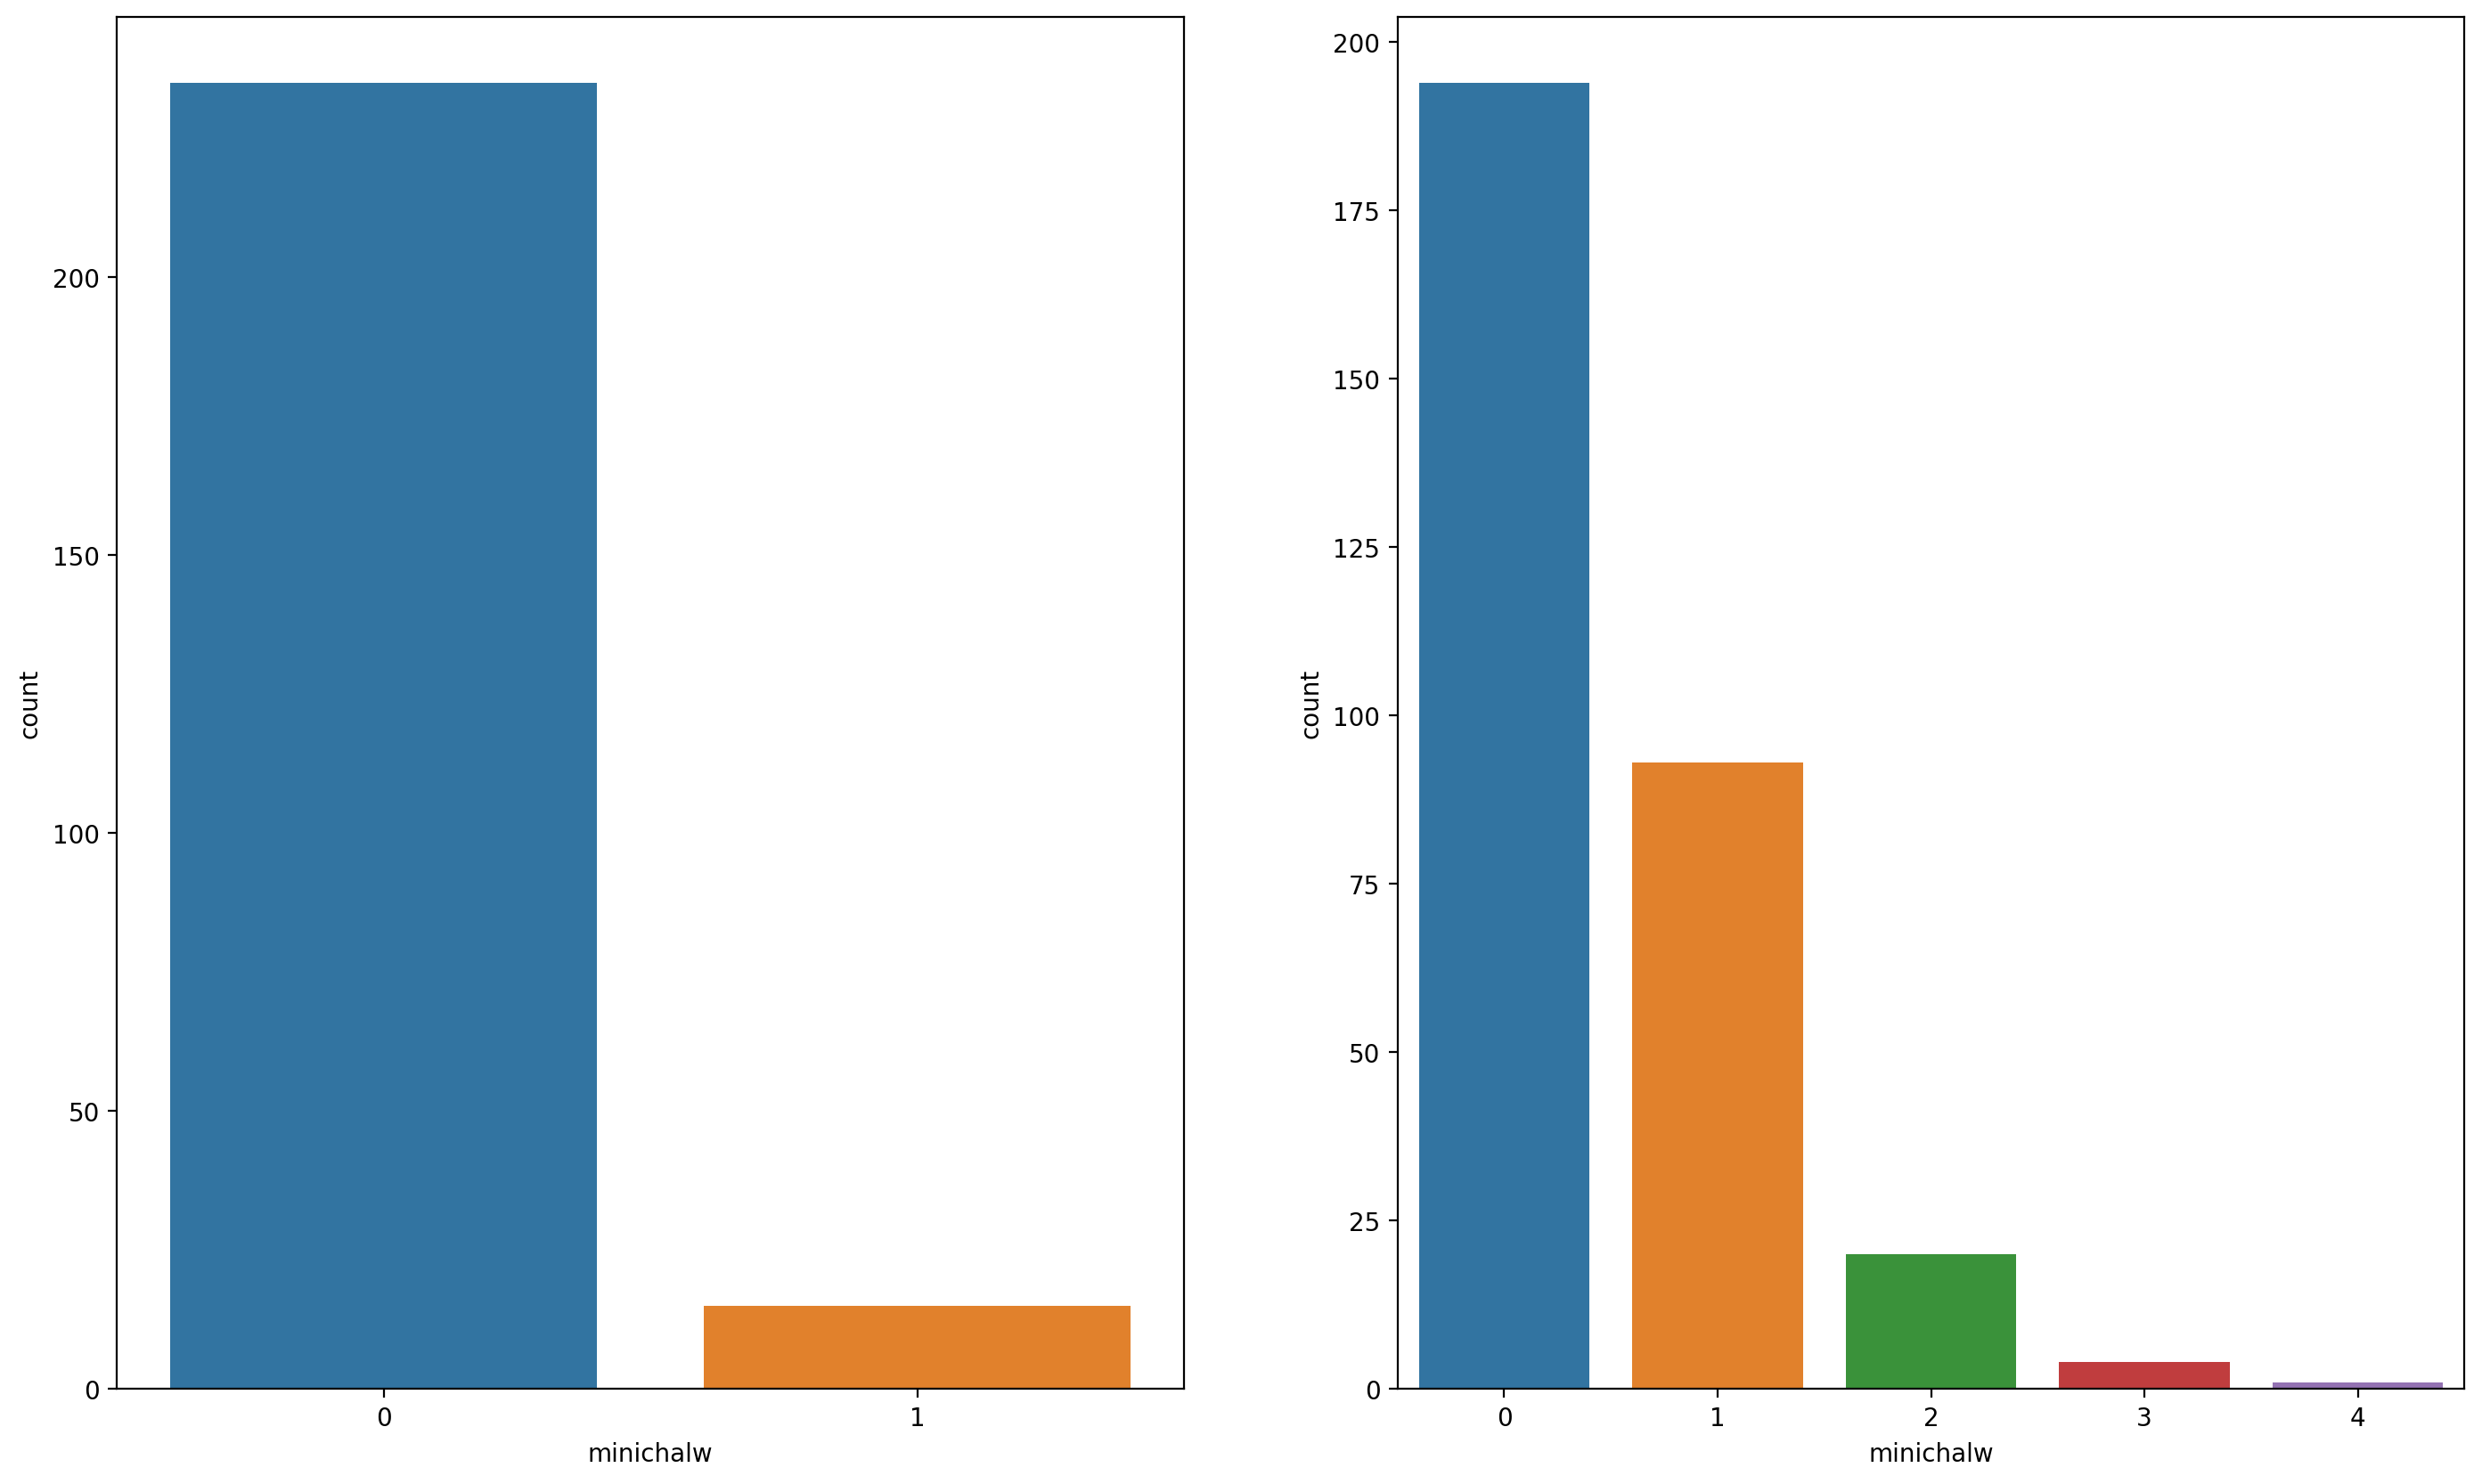

In [11]:
minichalw = train.groupby([train.index.get_level_values(1),'winner']).minichalw.sum().reset_index()
fig, axs = plt.subplots(1,2,figsize=(17,10))
sns.countplot(data=minichalw[minichalw.winner],x='minichalw',ax=axs[0])
sns.countplot(data=minichalw[~minichalw.winner],x='minichalw',ax=axs[1])
plt.show()

Winners actually win FEWER mini-challenges than losers

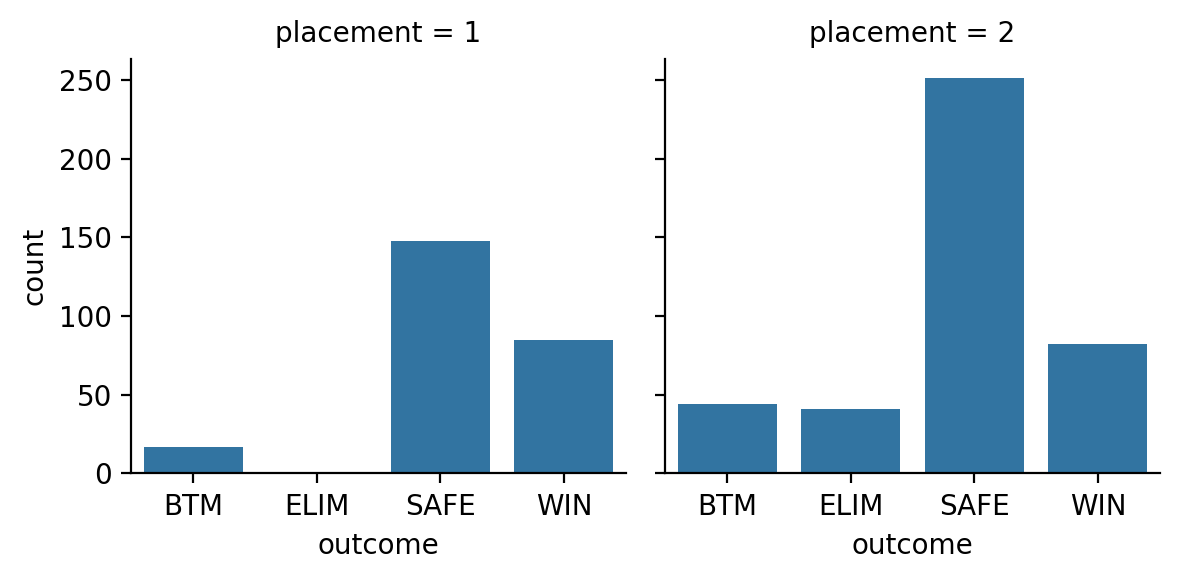

In [12]:
runners_up = train[train.placement < 3]
g = sns.FacetGrid(data=runners_up,col='placement')
g.map_dataframe(sns.countplot,x='outcome')

<Axes: xlabel='minichalw', ylabel='count'>

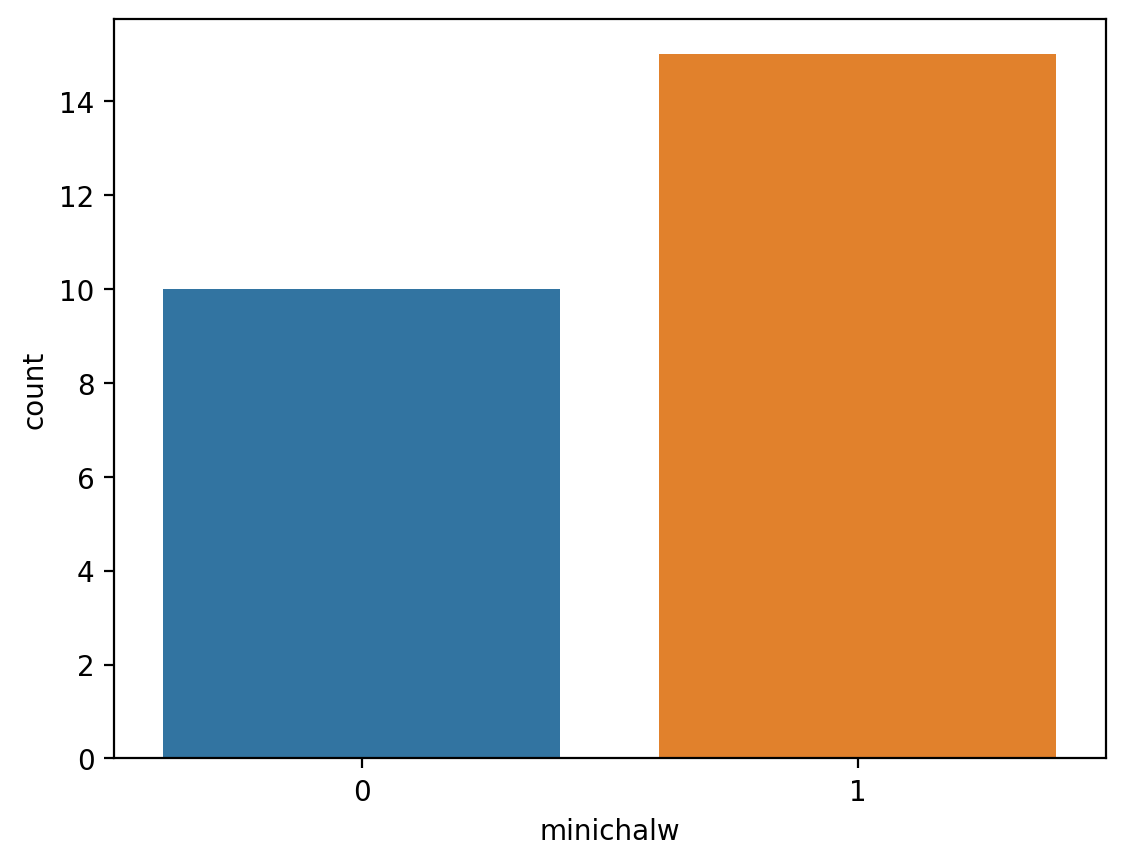

In [13]:
mini_wins = train.groupby(['queen_name','winner','season']).minichalw.sum().reset_index()
sns.countplot(data=mini_wins[mini_wins.winner],x='minichalw')

In [14]:
import queeneps as qe

soups = w.get_soups()
contep = qe.get_all_contep(soups)

In [15]:
import lipsyncs

In [31]:

reload(lipsyncs)
lipsyncs.get_all_lipsyncs(soups)

,series,season,episode,queen_1,queen_2,song_name,artist,eliminated,queen_3,queen_4,queen_5
0,Rupaul's Drag Race,1,1,Akashia,"Victoria ""Porkchop"" Parker",Supermodel (You Better Work),RuPaul,"Victoria ""Porkchop"" Parker",NaN,NaN,NaN
1,Rupaul's Drag Race,1,2,Akashia,Tammie Brown,We Break the Dawn,Michelle Williams,Tammie Brown,NaN,NaN,NaN
2,Rupaul's Drag Race,1,3,Akashia,Shannel,The Greatest Love of All,Whitney Houston,Akashia,NaN,NaN,NaN
3,Rupaul's Drag Race,1,4,Jade,Rebecca Glasscock,Would I Lie to You?,Eurythmics,Jade,NaN,NaN,NaN
4,Rupaul's Drag Race,1,5,BeBe Zahara Benet,Ongina,Stronger,Britney Spears,Ongina,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5,Drag Race France,1,6,La Big Bertha,Lolita Banana,Corps,Yseult,La Big Bertha,NaN,NaN,NaN
6,Drag Race France,1,7,Lolita Banana,Soa de Muse,Dieu m'a donné la foi,Ophélie Winter,Soa de Muse,NaN,NaN,NaN
7,Drag Race France,1,7,La Grande Dame,Paloma,Le Banana Split,Lio,Paloma,NaN,NaN,NaN
8,Drag Race France,1,7,La Grande Dame,Lolita Banana,La grenade,Clara Luciani,Lolita Banana,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 503 entries, ('Symone', 159) to ('Pythia', 248)
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   age                    503 non-null    uint16        
 1   series                 503 non-null    object        
 2   season                 503 non-null    uint8         
 3   placement              503 non-null    int8          
 4   city                   503 non-null    object        
 5   region                 503 non-null    object        
 6   relative_placement     503 non-null    float64       
 7   winner                 503 non-null    bool          
 8   episode                503 non-null    uint8         
 9   outcome                503 non-null    category      
 10  minichalw              503 non-null    bool          
 11  episode_name           502 non-null    object        
 12  air_date               503 non-null   